# Pie chart

Some <b>pyam</b> plots like Pie chart are built upon <b>matplotlib</b>, so we need to import the library 

In [3]:
import os
import matplotlib.pyplot as plt
import pyam

Importing WILIAM results in the converted file in IAMC format

In [8]:
# path to the results file (in IAMC format)
path = "..\\Final_script\\File_Converted\\"

try:
    # df = pd.read_csv(path + "Baseline no policies no CO2taxconverted.csv", sep=",")
    df = pyam.IamDataFrame(path + "Baseline no policies no CO2taxconverted.csv")
except:
    print("ERROR opening the file with results in IAMC format")

ERROR opening the file with results in IAMC format


In [9]:
# Import the library to efficiently search variables
import triesearching

# Creation of the trie (tree data structure) of our results
trie = triesearching.Trie()

for x in df.variable:
    trie.insert(x)

In [10]:
# Enter the prefix of the variable you want to see.

prefix = input("Enter a prefix to search for completions: ")
completions = triesearching.suggest_completions(trie, prefix)
print("Completions:", "\n".join(completions))

Completions: Primary Energy
Primary Energy|Agriculture Products
Primary Energy|Agriculture Products|Per Capita
Primary Energy|Coal
Primary Energy|Coal|Per Capita
Primary Energy|Forestry Products
Primary Energy|Forestry Products|Per Capita
Primary Energy|Geothermal
Primary Energy|Geothermal|Per Capita
Primary Energy|Hydropower
Primary Energy|Hydropower|Per Capita
Primary Energy|Natural Gas
Primary Energy|Natural Gas|Per Capita
Primary Energy|Nuclear
Primary Energy|Nuclear|Per Capita
Primary Energy|Ocean
Primary Energy|Ocean|Per Capita
Primary Energy|Oil
Primary Energy|Oil|Per Capita
Primary Energy|Renewable|Share
Primary Energy|Solar
Primary Energy|Solar|Per Capita
Primary Energy|Waste
Primary Energy|Waste|Per Capita
Primary Energy|Wind
Primary Energy|Wind|Per Capita


## Pie chart for a specific region which compared different variables

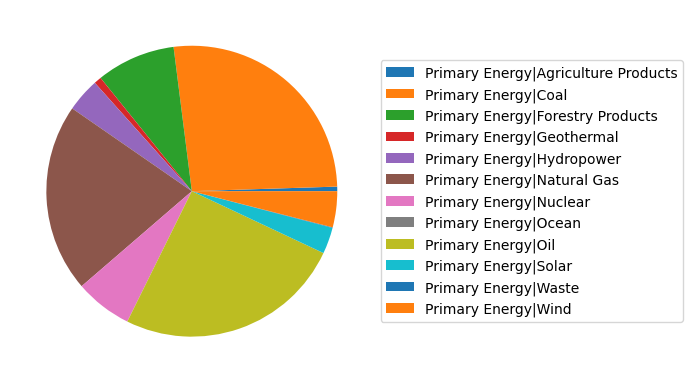

In [16]:
# filter to select the data for the plot
data = df.filter(variable = "Primary Energy|*", year=2050, region="World")

# customize the pie plot
data.plot.pie(labels=None, legend=True)
plt.tight_layout()
plt.show()

## Pie with a specific variable which compared different regions.

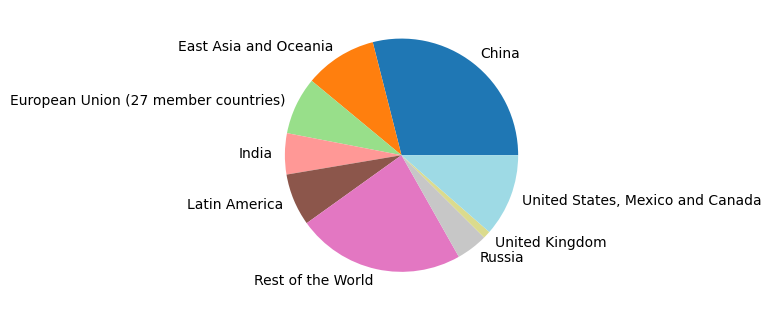

In [22]:
df.filter(variable="Emissions|CO2*").variable

# Select the variables and exclude "World" for the chart
data = df.filter(variable="Emissions|CO2", year=2050).filter(region="World", keep=False)

# select "region" as category to print in the pie chart
data.plot.pie(category="region", cmap="tab20")

plt.tight_layout()
plt.show()